In [1]:
# 70,000개의 글자 이미지에 각각 0부터 9까지 이름표를 붙인 데이터셋
# 손글씨 이미지를 몇 %나 정확히 예측

# 데이터 전처리

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
import tensorflow as tf
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping 
import os
import matplotlib.pyplot as plt
import numpy as np 
import sys

In [3]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [4]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [5]:
print("Train Set Img: %d 개" % (X_train.shape[0]))
print("Test Set Img: %d 개" % (X_test.shape[0]))

Train Set Img: 60000 개
Test Set Img: 10000 개


In [6]:
print(X_train.shape)
# row, column (28, 28) = 784 

(60000, 28, 28)


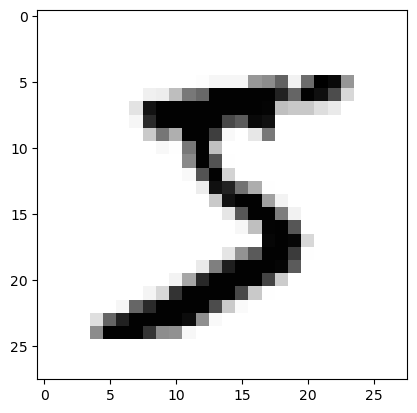

In [7]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

# X_train[n] => n 넣어보기 

In [8]:
# 가로 28 × 세로 28 = 총 784개의 픽셀
# 각 픽셀은 밝기 정도에 따라 0부터 255까지의 등급
# 흰색 0
# 글씨 1~255
# 긴 행렬로 이루어진 하나의 집합으로 변환

In [9]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i) #\t : tab
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [10]:
# row, column (28, 28) 2차원 배열 => 784의 1차원 배열로 
# reshape(total sample num, 1 dimension attribute num)

In [11]:
X_train = X_train.reshape(X_train.shape[0], 784)

# 데이터 정규화(normalization)
- 데이터의 폭이 클 때 적절한 값으로 분산의 정도를 바꾸는 과정을 
- 불러온 데이터 => Attribute(X) , Class(Y)로 구분
- Train Set Img: 60000 개
- Test Set Img: 10000 개

In [12]:
# 0~255 사이의 값으로 이루어진 값 => 0에서 1 사이의 값으로 변환
# 바꾸는 방법은 각 값을 255로 나누는 것

In [13]:
# 정규화를 위해 실수형으로 
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 225

In [14]:
print("class : %d " % (Y_class_train[0]))

class : 5 


# One Hot Encoding (Binary화)
- 분류문제 해결위해서 적용
- 0 ~ 9 정수 => 0 ~ 1 벡터 값으로 
- 5       => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [15]:
# np_utils.to_categorical(class, class num)

In [16]:
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [17]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Deep Learning 기본 프레임 만들기 

In [18]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Attribute: 784 & Class: 10

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 입력 값(input_dim) 784개, 은닉층 512개, 출력 10개

In [21]:
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 저장 & 최적화 단계에서 (자동) 학습 중단

In [22]:
MODEL_DIR= './model/'
if not os.path.exists(MODEL_DIR): 
    os.mkdir(MODEL_DIR)

modelpath='./model/{epoch:02d}={val_loss:4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [23]:
# sample 200 => 30 번 실행 
# test set으로 최종 모델 성과 측정 -> 출력

In [25]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])
 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.09799, saving model to ./model\01=0.097991.hdf5

Epoch 00002: val_loss improved from 0.09799 to 0.08091, saving model to ./model\02=0.080912.hdf5

Epoch 00003: val_loss improved from 0.08091 to 0.07820, saving model to ./model\03=0.078200.hdf5

Epoch 00004: val_loss improved from 0.07820 to 0.07479, saving model to ./model\04=0.074794.hdf5

Epoch 00005: val_loss improved from 0.07479 to 0.07192, saving model to ./model\05=0.071924.hdf5

Epoch 00006: val_loss improved from 0.07192 to 0.06609, saving model to ./model\06=0.066089.hdf5

Epoch 00007: val_loss did not improve from 0.06609

Epoch 00008: val_loss did not improve from 0.06609

Epoch 00009: val_loss did not improve from 0.06609

Epoch 00010: val_loss did not improve from 0.06609

Epoch 00011: val_loss did not improve from 0.06609

Epoch 00012: val_loss did not improve from 0.06609

Epoch 00013: val_loss improved from 0.06609 to 0.06407, saving model to ./model\13=0.064069.hdf5

Epoch

In [26]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.0722 - accuracy: 0.9842

 Test Accuracy: 0.9842


In [ ]:
# 정확도 : 98.4 % 

# Graph

In [ ]:
# Train Set Loss (오차) & Test Set 
# Train Set Loss = 1 - Train Set Accuracy 

In [27]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

In [29]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

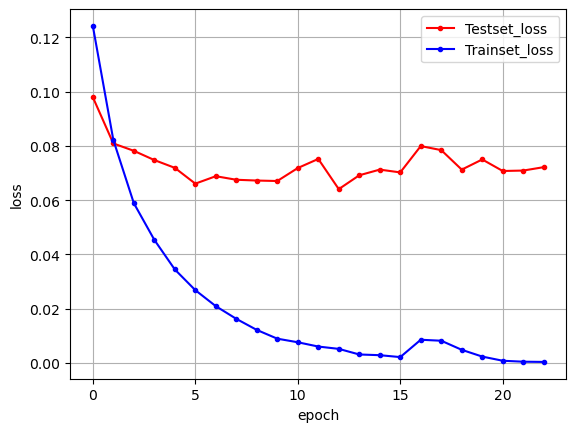

In [30]:
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()